# Netflix Data Exploratory and Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import autoreload
import missingno as msno
import os
import csv
import sys

from collections import defaultdict, Counter

%matplotlib inline

sb.set()
sb.set_style('darkgrid')

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)

In [3]:
df = pd.read_csv(r"D:\Open Classroom\Datasets\Netflix Data Cleaning, Analysis and Visualization\netflix1.csv")
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [4]:
df.shape

(8790, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [6]:
round(df.describe())

,release_year
count,8790.0
mean,2014.0
std,9.0
min,1925.0
25%,2013.0
50%,2017.0
75%,2019.0
max,2021.0


In [7]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [9]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


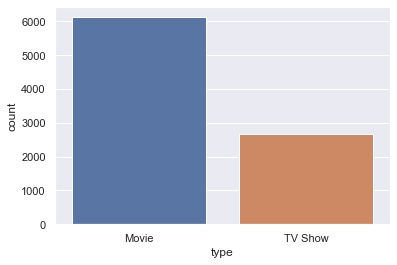

In [10]:
sb.countplot(df['type'])

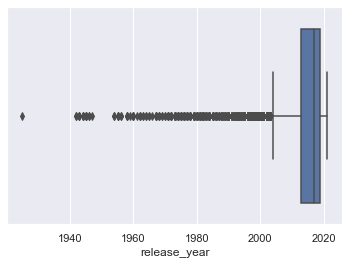

In [15]:
sb.boxplot(df['release_year'])

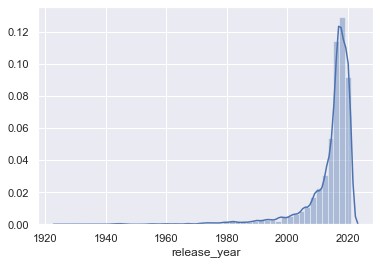

In [17]:
sb.distplot(df['release_year'])

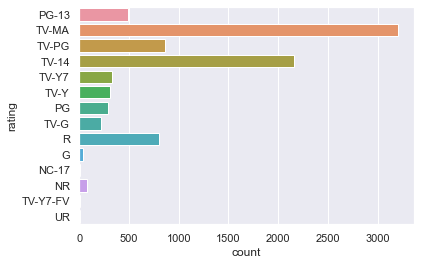

In [27]:
sb.countplot(y = df['rating'])

In [35]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [36]:
df['date_added'] = pd.to_datetime(df['date_added'])

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 686.8+ KB


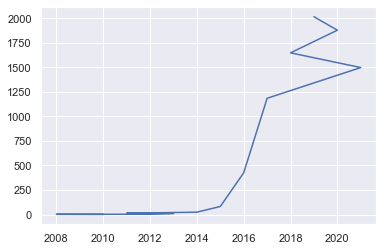

In [83]:
year = df['date_added'].dt.year.value_counts().to_frame().rename(columns = {'date_added':'year_count'})
plt.plot(year['year_count'])

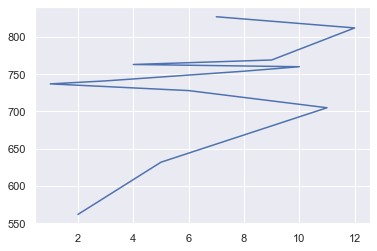

In [100]:
month = df['date_added'].dt.month.value_counts().to_frame().rename(columns = {'date_added':'month_count'})
month
plt.plot(month['month_count'])

In [98]:
day = df['date_added'].dt.day.value_counts().to_frame().sort_values(by = 'date_added', ascending = False).rename(columns = {'date_added':'day_count'})
day.head(10)


,day_count
1,2209
15,686
2,325
16,288
31,274
20,249
19,243
5,231
22,230
10,214


In [101]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [125]:
with open(r"D:\Open Classroom\Datasets\Netflix Data Cleaning, Analysis and Visualization\netflix1.csv", encoding = 'latin1') as file:
    file_reader = csv.DictReader(file)
    file_counter = Counter()
    
    for i in file_reader:
        file_counter.update(i['listed_in'].lstrip().split(','))
        
    #for genre, pop in file_counter.most_common():
     #   print(f'{genre} \t\t\t {pop}')
      #  print()
print(file_counter.most_common())

[(' International Movies', 2624), ('Dramas', 1599), ('Comedies', 1210), ('Action & Adventure', 859), ('Documentaries', 829), (' Dramas', 827), ('International TV Shows', 773), (' Independent Movies', 736), (' TV Dramas', 695), (' Romantic Movies', 613), ('Children & Family Movies', 605), (' International TV Shows', 576), (' Thrillers', 512), (' Comedies', 464), (' TV Comedies', 454), ('Crime TV Shows', 399), ("Kids' TV", 385), (' Music & Musicals', 357), (' Romantic TV Shows', 338), ('Stand-Up Comedy', 334), ('Horror Movies', 275), ('British TV Shows', 252), (' Sci-Fi & Fantasy', 230), ('Docuseries', 220), (' Sports Movies', 218), (' Docuseries', 174), ('Anime Series', 174), (' Spanish-Language TV Shows', 171), (' Korean TV Shows', 151), (' Reality TV', 135), (' TV Action & Adventure', 128), ('International Movies', 128), ('Reality TV', 120), ('TV Comedies', 119), (' LGBTQ Movies', 101), (' TV Mysteries', 98), (' Science & Nature TV', 92), (' Horror Movies', 82), (' TV Sci-Fi & Fantasy